# Loan Prediction Problem 

Among all industries, the insurance domain has one of the largest uses of analytics & data science methods. This dataset provides you a taste of working on data sets from insurance companies – what challenges are faced there, what strategies are used, which variables influence the outcome, etc. This is a classification problem. The data has 615 rows and 13 columns.

Data and Problem given from AnalyticsVidhya

In [1]:
#Imports 
import csv 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from itertools import zip_longest
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt


# Data Visualization

In [2]:
#Reading csv file into a dataframe
df = pd.read_csv(r'C:\Users\Nila\Documents\DataScience\LoanPrediction\train.txt',delimiter=',')
test = pd.read_csv(r'C:\Users\Nila\Documents\DataScience\LoanPrediction\test.txt',delimiter=',')
df



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


C:\Users\Nila\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nila\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nila\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


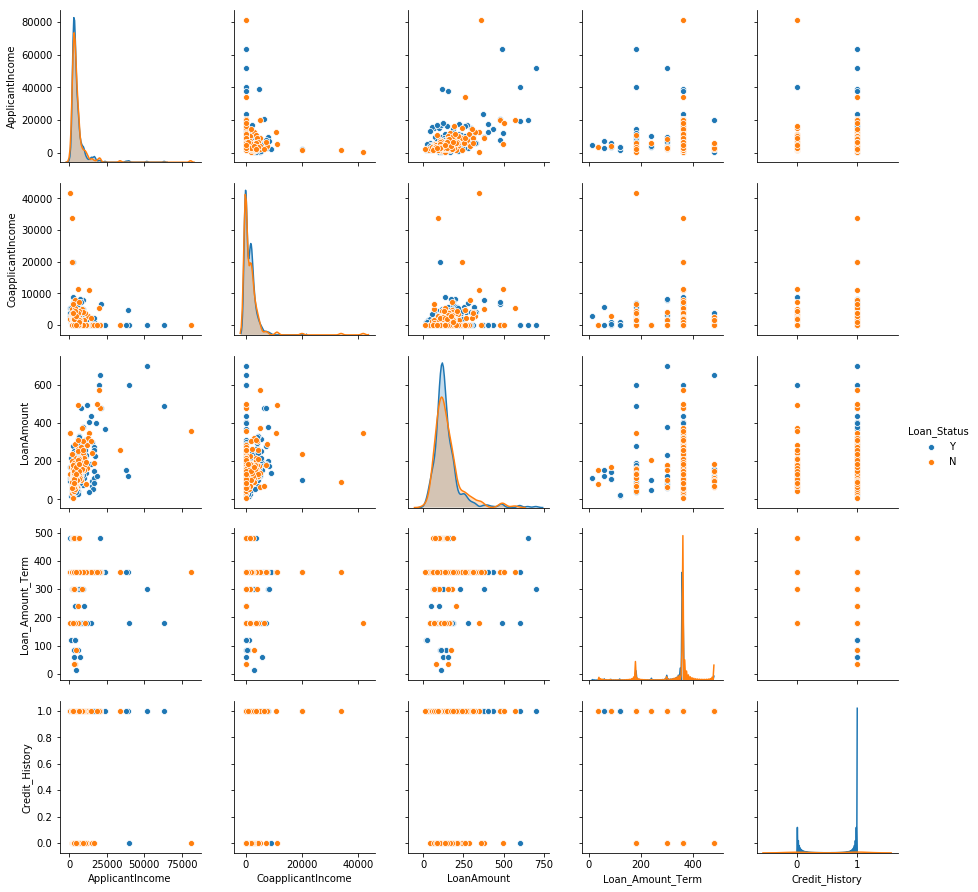

In [3]:
import seaborn as sns
plot = sns.pairplot(data = df, hue ="Loan_Status")
plt.show()

In [4]:
#Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split

#Training Set
x = df.iloc[:,[2,3,4,5,6,7,8,9,10,11]]
y = df.iloc[:,12]

#Test Set 
x_final_test = test.iloc[:,[2,3,4,5,6,7,8,9,10,11]]

ID = test.iloc[:,0]


In [5]:
#Training Data
#Convert Data to Numeric Data 

#Married 
temp = x.iloc[:,0].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,0] = new

#Education 
temp = x.iloc[:,2].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,2] = new

#Self Employed
temp = x.iloc[:,3].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,3] = new

#Property Area
temp = x.iloc[:,9].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,9] = new

#Dependents 
temp = x.iloc[:,1].tolist()
#replace 3+ to 3
for i in range(1, len(temp)):   
    if (temp[i] == "3+"): 
        temp[i] = 3
    
x.iloc[:,1] = temp

x = x.fillna(-1)


temp = y
new = pd.factorize(temp)[0]
y = new



C:\Users\Nila\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
#TEST DATA
#Convert Data to Numeric Data 

#Married 
temp = x_final_test.iloc[:,0].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,0] = new

#Education 
temp = x_final_test.iloc[:,2].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,2] = new

#Self Employed
temp = x_final_test.iloc[:,3].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,3] = new

#Property Area
temp = x_final_test.iloc[:,9].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,9] = new

#Dependents 
temp = x_final_test.iloc[:,1].tolist()
#replace 3+ to 3
for i in range(1, len(temp)):   
    if (temp[i] == "3+"): 
        temp[i] = 3
    
x_final_test.iloc[:,1] = temp

x_final_test = x_final_test.fillna(-1)




# Logistic Regression

The point of logistic regression to find the best fitting line(the curve) to fit the datasets(given the data). This line is the model. We can use the line to predict probability(p_hat) whether something will happen. 

We project the x values on the line to find the probablity of whether the event will occur. The probability is used like a score. 

Predicted y value = y_hat

You have to select the horizontal line cutting the fitting(curve) line in half. Anything below the line will be one prediction, anything above the line will be another prediction. You will determine the line that fits best, usually 50% is picked. 




In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#Feature Scaling 
#Accurate Predicitions which users will buy the loan
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)


#Fitting Logistic Regression to the Training Set 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

#Predicting the Test Set Results
#0 is Yes, 1 is No
y_pred = classifier.predict(x_test)


#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm

C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Nila\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  
C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[82,  8],
       [25,  8]], dtype=int64)

In [8]:
#SUBMISSION INTO COMPETITION MODEL

#Accurate Predicitions which users will buy the loan
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x_final_test = sc_x.transform(x_final_test)


#Fitting Logistic Regression to the Training Set 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x,y)

#Predicting the Test Set Results
#0 is Yes, 1 is No
y_pred = classifier.predict(x_final_test)



C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Nila\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  import sys
C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
#CREATING CSV FILE 
id_numbers = ID.tolist()
y_predict = []

for i in y_pred: 
    if (i == 0):
        y_predict.append('Y')
    elif (i ==1):
        y_predict.append('N')
        
d = [id_numbers, y_predict]
export_data = zip_longest(*d, fillvalue = '')
with open('submission_lr.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Loan_ID", "Loan_Status"))
      wr.writerows(export_data)
myfile.close()

        



Received 70.8% Accuracy on the Leaderboard

# K Nearest Neighbors

Write the Description Later

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#Feature Scaling 
#Accurate Predicitions which users will buy the loan
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#Fitting Classifier to the Training Set 
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(x_train,y_train)


#Predicting the Test Set Results

#0 is Yes, 1 is No
y_pred = classifier.predict(x_test)

#evaluate accuracy 
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))




0.7886178861788617


In [11]:
#creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    


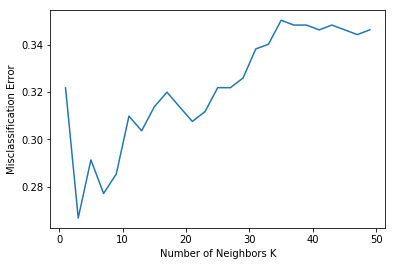

3


In [12]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]


# determining best k
#optimal_k = classifier.kneighbors(n_neighbors = MSE.index(min(MSE)))
optimal_k = neighbors[MSE.index(min(MSE))]
#print "The optimal number of neighbors is d" % optimal_k

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print(optimal_k)

In [13]:
#Submission into Competition

#Fitting Classifier to the Training Set 
from sklearn.neighbors import KNeighborsClassifier 
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)
classifier.fit(x,y)

#0 is Yes, 1 is No
y_pred = classifier.predict(x_final_test)



In [14]:
#CREATING CSV FILE 
id_numbers = ID.tolist()
y_predict = []

for i in y_pred: 
    if (i == 0):
        y_predict.append('Y')
    elif (i ==1):
        y_predict.append('N')
        
d = [id_numbers, y_predict]
export_data = zip_longest(*d, fillvalue = '')
with open('submission_knn.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Loan_ID", "Loan_Status"))
      wr.writerows(export_data)
myfile.close()


68.75% Accuracy for Test Data 

# Support Vector Machine(SVM)

We start with points on a two dimmensional place, but how do we derive a a line to seperate and create a decision boundary? We can draw many lines between them, but how do we know which one is the right one? 

Line is searched through Maximum Margin. The Maximum Margin is drawn between two points(the support vectors). The support vectors are the points closest points between each classes(each one is from a different class). 

The line in the middle of the maximum margin it is called the hyperplane (Maximum Margin Classifier). There is a positive and negative hyperplane, the closest line to each side. One side is positive, usually the right and one is negative usually the left one. 

It classifies based on the differences, the outliers versus the general criteria. 

# Kernel SVM

SVM, but what if you cannot find a boundary? Or, it is not possible to seperate the data(Not Linearly Separable Data). 

Mapping to a Higher Dimension: 
    1. 2D Space Unable to Linearly Seperate 
    2. Apply a Mapping Function 
    3. Becomes a 3D Space 
    4. The linear seperator is a hyperplane to seperate points in a 3D Space
    5. Project it back into a 2D Space 

**Mapping to a Higher Dimensional Space can be highly compute-intensive. It can cause a lot of delays 

Types of Kernel Functions
    1. The Gaussian RBF Kernel 
    2. Sigmoid Kernel 
    3. Polynomial Kernel


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#Feature Scaling 
#Accurate Predicitions which users will buy the loan
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

#Fitting Classifier to the Training Set 
from sklearn.svm import SVC

#Parameters 
    #C used to improve later 
    #kernel: linear(most common), poly, rbf
classifier = SVC(kernel = 'rbf' ,random_state = 0)
classifier.fit(x_train,y_train)


#Predicting the Test Set Results
#0 is Yes, 1 is No
y_pred = classifier.predict(x_test)

#evaluate accuracy 
from sklearn import metrics
print("Cross Validation Accuracy Test")
print(metrics.accuracy_score(y_test, y_pred))


#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
cm


Cross Validation Accuracy Test
0.8292682926829268


array([[88,  2],
       [19, 14]], dtype=int64)

In [16]:
#Fitting Classifier to the Training Set 
from sklearn.svm import SVC

#Parameters 
    #C used to improve later 
    #kernel: linear(most common), poly, rbf
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x,y)


#Predicting the Test Set Results
#0 is Yes, 1 is No
y_pred = classifier.predict(x_final_test)

#CREATING CSV FILE 
id_numbers = ID.tolist()
y_predict = []

for i in y_pred: 
    if (i == 0):
        y_predict.append('Y')
    elif (i ==1):
        y_predict.append('N')
        
d = [id_numbers, y_predict]
export_data = zip_longest(*d, fillvalue = '')
with open('submission_svm.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Loan_ID", "Loan_Status"))
      wr.writerows(export_data)
myfile.close()



Reached 77.8 % Accuracy with SVM with Submission

# Decision Tree Classification

Best Max Depth 2


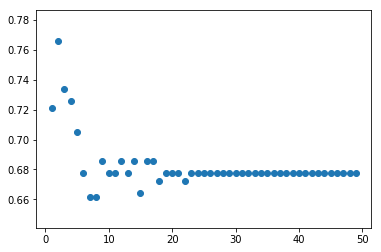

In [17]:
from sklearn.tree import DecisionTreeClassifier
x_val = []
y_val = []
max = 0
depth = 0
for i in range(1,50):
    clf = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf.fit(x,y)
    scores = cross_val_score(clf, x, y, cv=5)
    if (min(scores)>max): 
        max = min(scores)
        depth = i
        
    y_val.append(min(scores))
    x_val.append(i)
plt.scatter(x_val,y_val)
print("Best Max Depth", depth)

In [18]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 2)
clf.fit(x,y)
scores = cross_val_score(clf, x, y, cv=5)
#Predicting the Test Set Results
#0 is Yes, 1 is No
y_pred = clf.predict(x_final_test)

#CREATING CSV FILE 
id_numbers = ID.tolist()
y_predict = []

for i in y_pred: 
    if (i == 0):
        y_predict.append('Y')
    elif (i ==1):
        y_predict.append('N')

d = [id_numbers, y_predict]
export_data = zip_longest(*d, fillvalue = '')
with open('submission_dt.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Loan_ID", "Loan_Status"))
      wr.writerows(export_data)
myfile.close()

Reached 77.8 % Accuracy with Decision Tree Classifier with Submission

# Random Forest Classification

Best Max Depth 3


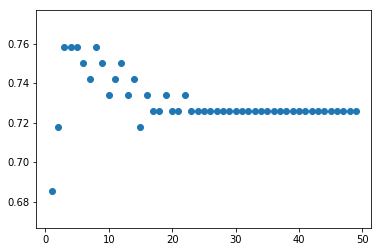

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
x_val = []
y_val = []
max = 0
depth = 0
for i in range(1,50):
    clf = RandomForestClassifier(n_estimators=100, max_depth=i,random_state=0) 
    clf.fit(x,y)
    scores = cross_val_score(clf, x, y, cv=5)
    if (min(scores)>max): 
        max = min(scores)
        depth = i
        
    y_val.append(min(scores))
    x_val.append(i)
plt.scatter(x_val,y_val)
print("Best Max Depth", depth)

In [20]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3,random_state=0) 
clf.fit(x,y)
y_pred = clf.predict(x_final_test)

#CREATING CSV FILE 
id_numbers = ID.tolist()
y_predict = []

for i in y_pred: 
    if (i == 0):
        y_predict.append('Y')
    elif (i ==1):
        y_predict.append('N')

d = [id_numbers, y_predict]
export_data = zip_longest(*d, fillvalue = '')
with open('submission_rf.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Loan_ID", "Loan_Status"))
      wr.writerows(export_data)
myfile.close()

Random Forest Classifier Submission was 76.8% Accurate

# Feature Engineering 

In [21]:
df = pd.read_csv(r'C:\Users\Nila\Documents\DataScience\LoanPrediction\train.txt',delimiter=',')
test = pd.read_csv(r'C:\Users\Nila\Documents\DataScience\LoanPrediction\test.txt',delimiter=',')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
#Add a total income column 
#Total Income = ApplicantIncome + CoapplicantIncome 

df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
test["Total_Income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,5587
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,2226
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,3881
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,13633
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,4800


In [24]:
#Dividing Loan Amount by Total Income 
df["LoanByIncome"] = df["LoanAmount"] / df["Total_Income"]
test["LoanByIncome"] = test["LoanAmount"] / test["Total_Income"]

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanByIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023500
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,0.027775
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0,0.024682
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5540.0,0.028520
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5532.0,0.030369
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,23809.0,0.014658


Data Cleaning

In [25]:
     # Impute missing data in train file with mean values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(1,inplace=True)
df['Married'].fillna('Yes',inplace=True)
df['Gender'].fillna('Male',inplace=True)
df['Dependents'].fillna('0',inplace=True)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [26]:
#Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split

ID = test.iloc[:,0]

#Training Set
x = df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,13,14]]
y = df.iloc[:,12]

#Test Set 
x_final_test = test.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]]


In [27]:
#Training Data
#Convert Data to Numeric Data 

#Gender
temp = x.iloc[:,0].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,0] = new
            
#Married 
temp = x.iloc[:,1].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,1] = new

#Education 
temp = x.iloc[:,3].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,3] = new

#Self Employed
temp = x.iloc[:,4].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,4] = new

#Property Area
temp = x.iloc[:,10].tolist()
new = pd.factorize(temp)[0]
x.iloc[:,10] = new

#Dependents 
temp = x.iloc[:,2].tolist()
#replace 3+ to 3
for i in range(1, len(temp)):   
    if (temp[i] == "3+"): 
        temp[i] = 3
    
x.iloc[:,2] = temp

x = x.fillna(-1)

#y training value 
temp = y
new = pd.factorize(temp)[0]
y = new

x.head()


C:\Users\Nila\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,LoanByIncome
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,5849.0,-1.000000
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,6091.0,0.021015
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,3000.0,0.022000
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,4941.0,0.024287
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,6000.0,0.023500


In [28]:
#TEST DATA
#Convert Data to Numeric Data 
            

#Gender
temp = x_final_test.iloc[:,0].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,0] = new

#Married 
temp = x_final_test.iloc[:,1].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,1] = new

#Education 
temp = x_final_test.iloc[:,3].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,3] = new

#Self Employed
temp = x_final_test.iloc[:,4].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,4] = new

#Property Area
temp = x_final_test.iloc[:,10].tolist()
new = pd.factorize(temp)[0]
x_final_test.iloc[:,10] = new

#Dependents 
temp = x_final_test.iloc[:,2].tolist()
#replace 3+ to 3
for i in range(1, len(temp)):   
    if (temp[i] == "3+"): 
        temp[i] = 3
    
x_final_test.iloc[:,2] = temp

x_final_test = x_final_test.fillna(-1)

x_final_test.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,LoanByIncome
0,0,0,0,0,0,5720,0,110.0,360.0,1.0,0,5720,0.019231
1,0,0,1,0,0,3076,1500,126.0,360.0,1.0,0,4576,0.027535
2,0,0,2,0,0,5000,1800,208.0,360.0,1.0,0,6800,0.030588
3,0,0,2,0,0,2340,2546,100.0,360.0,-1.0,0,4886,0.020467
4,0,1,0,1,0,3276,0,78.0,360.0,1.0,0,3276,0.023810


In [29]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,LoanByIncome
0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,0,5849.0,-1.000000
1,0,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,1,6091.0,0.021015
2,0,1,0,0,1,3000,0.0,66.000000,360.0,1.0,0,3000.0,0.022000
3,0,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,0,4941.0,0.024287
4,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,0,6000.0,0.023500


Data Visualization

C:\Users\Nila\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Nila\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Nila\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


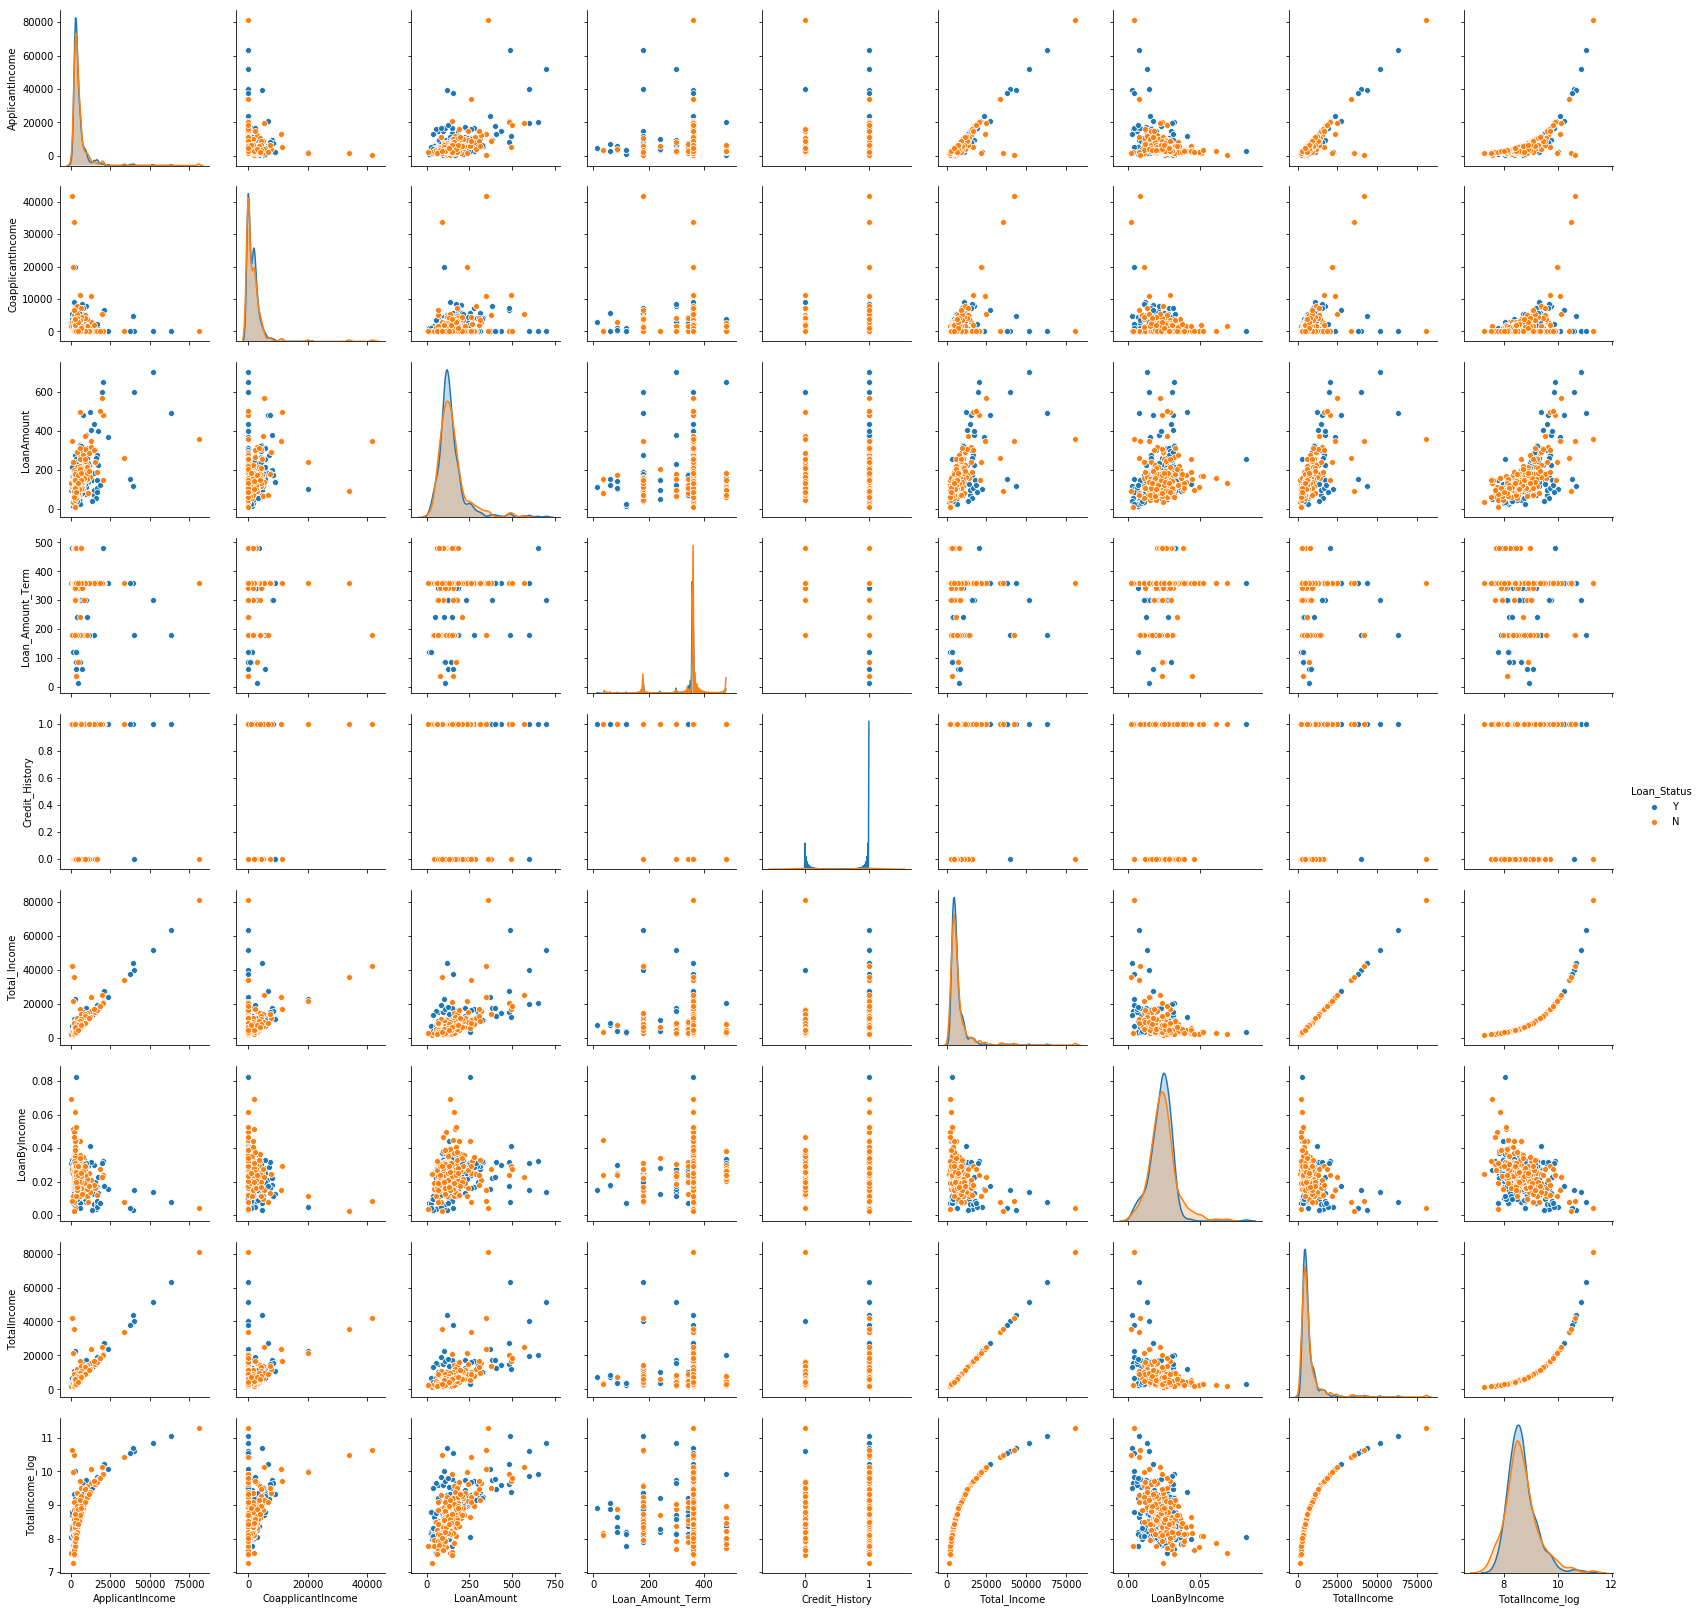

In [30]:
import seaborn as sns
plot = sns.pairplot(data = df, hue ="Loan_Status")
plt.show()
#https://towardsdatascience.com/data-cleaning-and-feature-engineering-in-python-b4d448366022

# Random Forest Tree(Feature Engineering)

C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Nila\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Nila\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  import sys


Best Max Depth 7


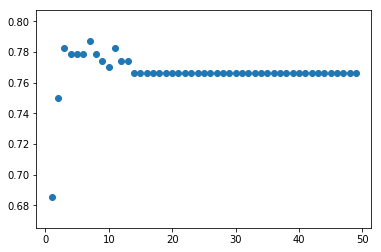

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x_final_test = sc_x.transform(x_final_test)

x_val = []
y_val = []
max = 0
depth = 0
for i in range(1,50):
    clf = RandomForestClassifier(n_estimators=100, max_depth=i,random_state=0) 
    clf.fit(x,y)
    scores = cross_val_score(clf, x, y, cv=5)
    if (min(scores)>max): 
        max = min(scores)
        depth = i
        
    y_val.append(min(scores))
    x_val.append(i)
plt.scatter(x_val,y_val)
print("Best Max Depth", depth)

In [32]:
clf = RandomForestClassifier(n_estimators=100, max_depth=9,random_state=0) 
clf.fit(x,y)
y_pred = clf.predict(x_final_test)

#CREATING CSV FILE 
id_numbers = ID.tolist()
y_predict = []

for i in y_pred: 
    if (i == 0):
        y_predict.append('Y')
    elif (i ==1):
        y_predict.append('N')

d = [id_numbers, y_predict]
export_data = zip_longest(*d, fillvalue = '')
with open('submission_rf_fg.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Loan_ID", "Loan_Status"))
      wr.writerows(export_data)
myfile.close()

77.8% Accurate